<a href="https://colab.research.google.com/github/bernase/COMP4350-IntroToML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melek Berna Şerit - 18070001027
I use colab because i think it is very easy to use with an easy google drive connection. (Sometimes i edit or convert to pdf from DataSpell).
Github: https://github.com/bernase/COMP4350-IntroToML/blob/main/HW2.ipynb

In [ ]:
from keras.callbacks import History
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras as keras
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW2 /train.csv')
#validation_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HW2 /test.csv')
train_data.head()

Mounted at /content/drive


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.shape

(614, 13)

In [ ]:
train_data = train_data.drop(columns=['Loan_ID'])

KeyError: ignored

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
print(categorical_columns)

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Loan_Amount_Term']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Amount_Term']


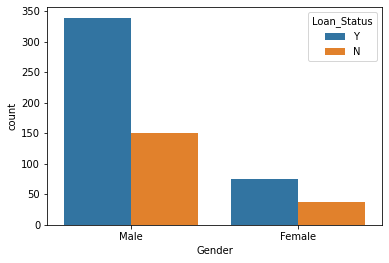

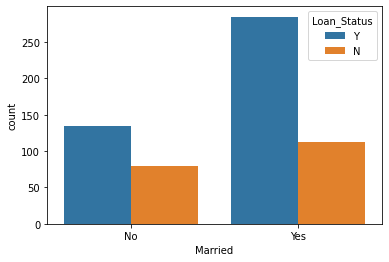

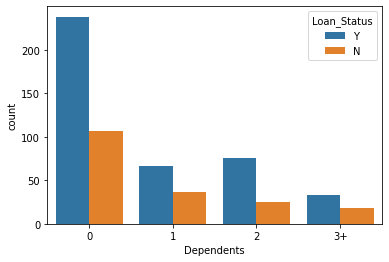

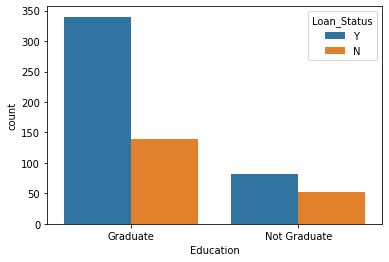

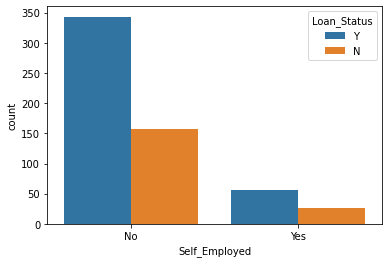

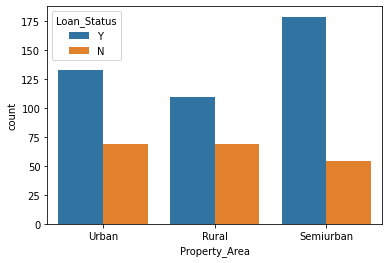

In [ ]:
for index, c_col in enumerate(categorical_columns):
    plt.figure(index)
    sns.countplot(x=c_col, data=train_data, hue='Loan_Status')

       ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
count       614.000000         614.000000  592.000000      564.000000   
mean       5403.459283        1621.245798  146.412162        0.842199   
std        6109.041673        2926.248369   85.587325        0.364878   
min         150.000000           0.000000    9.000000        0.000000   
25%        2877.500000           0.000000  100.000000        1.000000   
50%        3812.500000        1188.500000  128.000000        1.000000   
75%        5795.000000        2297.250000  168.000000        1.000000   
max       81000.000000       41667.000000  700.000000        1.000000   

       Loan_Amount_Term  
count         600.00000  
mean          342.00000  
std            65.12041  
min            12.00000  
25%           360.00000  
50%           360.00000  
75%           360.00000  
max           480.00000  


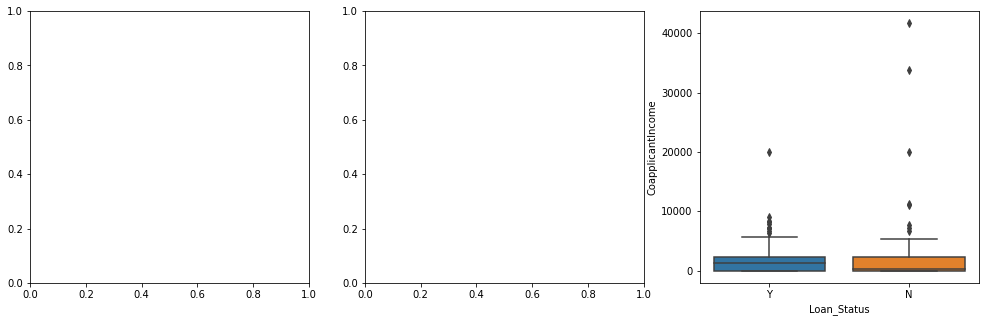

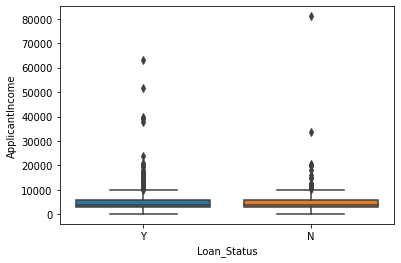

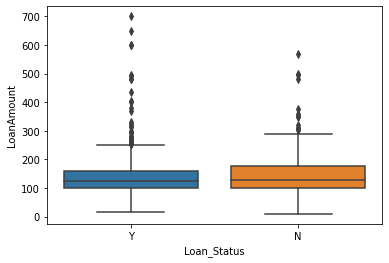

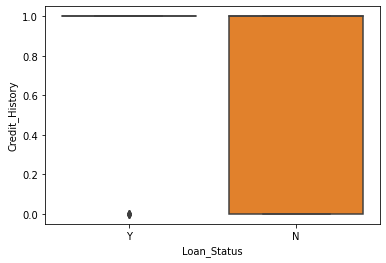

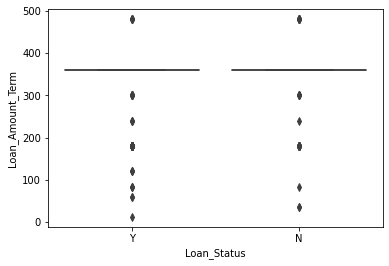

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for index, c_col in enumerate(numerical_columns):
    plt.figure(index)
    sns.boxplot(y=c_col, data=train_data, x='Loan_Status')

print(train_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [ ]:
train_data_encoded = pd.get_dummies(train_data, drop_first=True)
train_data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [ ]:
x = train_data_encoded.drop(columns='Loan_Status_Y')
y = train_data_encoded['Loan_Status_Y']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state =42)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(x_train)
x_train = imp_train.transform(x_train)
x_test_imp = imp_train.transform(x_test)

**Implement:**
*   Logistic regression
*   SVM
*   KNN
*   Decision Tree
*   Random Forest
*   XGBoost classifiers(*if it is requiring you can use GridSearch, kfold cross validation, and any method that makes you to improve your results.*) 
So,

In [ ]:
##  LOGISTIC REGRESSION ##
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test_imp)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Training score: ', logreg.score(x_train, y_train))

Accuracy score:  0.8536585365853658
F1 score:  0.903225806451613
Training score:  0.7881873727087576


In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


In [ ]:
##  SVM ##
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test_imp)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Training score: ', svc.score(x_train, y_train))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy score:  0.8373983739837398
F1 score:  0.8936170212765956
Training score:  0.7881873727087576


Predicted,0,1,All
True,,,
0,19,19,38
1,1,84,85
All,20,103,123


In [ ]:
##  KNN ##
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test_imp)

print(knn.score(x_train, y_train))

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Training score: ', knn.score(x_train, y_train))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.714867617107943
Accuracy score:  0.6504065040650406
F1 score:  0.7624309392265194
Training score:  0.714867617107943


Predicted,0,1,All
True,,,
0,11,27,38
1,16,69,85
All,27,96,123


In [ ]:
## DESICION TREE  ##
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)

print('Accuracy score: ', accuracy_score(y_train, y_pred))
print('F1 score: ', f1_score(y_train, y_pred))
print('Confusion matrix: ', confusion_matrix(y_train, y_pred))
print('Cross valdiation score mean: ', cross_val_score(dt, x_train, y_train, cv=5, scoring='f1_macro').mean())
print('Validation mean accuracy_score: ', cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy').mean())

Accuracy score:  1.0
F1 score:  1.0
Confusion matrix:  [[154   0]
 [  0 337]]
Cross valdiation score mean:  0.6543911860120784
Validation mean accuracy_score:  0.6944341372912801


In [ ]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=25)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test_imp)

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy score:  0.8211382113821138
Test F1 Score:  0.8777777777777777
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,6,79,85
All,28,95,123


In [ ]:
##  RANDOM FORREST  ##
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)

print('Accuracy score: ', accuracy_score(y_train, y_pred))
print('F1 score: ', f1_score(y_train, y_pred))
print('Confusion matrix: ', confusion_matrix(y_train, y_pred))
print('Cross valdiation score mean: ', cross_val_score(rf, x_train, y_train, cv=5, scoring='f1_macro').mean())
print('Validation mean accuracy_score: ', cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy').mean())

Accuracy score:  0.8004073319755601
F1 score:  0.8713910761154856
Confusion matrix:  [[ 61  93]
 [  5 332]]
Cross valdiation score mean:  0.7105036634489533
Validation mean accuracy_score:  0.79428983714698


In [ ]:
y_pred = rf.predict(x_test_imp)

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print("Test F1 Score: ", f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy score:  0.8455284552845529
Test F1 Score:  0.8983957219251337
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,20,18,38
1,1,84,85
All,21,102,123


In [ ]:
##  XGBoost CLASSIFIERS ##
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, max_depth=7, min_samples_leaf=25)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_train)

print('Accuracy score: ', accuracy_score(y_train, y_pred))
print('F1 score: ', f1_score(y_train, y_pred))
print('Confusion matrix: ', confusion_matrix(y_train, y_pred))
print('Cross valdiation score mean: ', cross_val_score(gb, x_train, y_train, cv=5, scoring='f1_macro').mean())
print('Validation mean accuracy_score: ', cross_val_score(gb, x_train, y_train, cv=5, scoring='accuracy').mean())

Accuracy score:  0.9389002036659878
F1 score:  0.9570200573065903
Confusion matrix:  [[127  27]
 [  3 334]]
Cross valdiation score mean:  0.690698641141886
Validation mean accuracy_score:  0.7616780045351474


In [ ]:
## BONUS: GRID SEARCH ##
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9, 11], 'min_samples_leaf': [5, 10, 15, 20, 25]}
grid = GridSearchCV(gb, param_grid, cv=5, scoring='f1_macro')
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_index_)
print(grid.cv_results_)

{'max_depth': 11, 'min_samples_leaf': 10, 'n_estimators': 400}
0.6994053271809197
GradientBoostingClassifier(max_depth=11, min_samples_leaf=10, n_estimators=400)
108
{'mean_fit_time': array([0.42703409, 0.31358719, 0.30991511, 0.43094912, 0.57886639,
       0.10062757, 0.20546622, 0.30235777, 0.39780211, 0.50635796,
       0.10062113, 0.19787841, 0.294274  , 0.39090328, 0.48028545,
       0.09855843, 0.19705529, 0.2894577 , 0.3831049 , 0.47915072,
       0.10136809, 0.19333353, 0.28500805, 0.37845817, 0.46799121,
       0.14888778, 0.29847121, 0.45232239, 0.59480863, 0.74695945,
       0.13548174, 0.26987314, 0.4121038 , 0.5405694 , 0.66599565,
       0.13174915, 0.25833349, 0.38826613, 0.50939784, 0.63433414,
       0.1237947 , 0.25046501, 0.37475839, 0.50197806, 0.61711168,
       0.11895561, 0.23921719, 0.35739212, 0.48191371, 0.59289994,
       0.19214005, 0.37964039, 0.56898465, 0.78749862, 0.9725112 ,
       0.16920142, 0.34620705, 0.65655823, 0.65144272, 0.82228141,
       0.154

Hence, as you can see above, the best mdoel is "Gradient Boosting Classifier" with an accuracy of **0.93**